In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
file00 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/couple_b.csv')
file01 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/family_b.csv')
file02 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/hotel_b.csv')
file03 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/guesthouse_b.csv')
file04 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/pension_b.csv')
file10 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/민경 result data/recommend_li_couple_after.csv')
file11 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/민경 result data/recommend_li_family_after.csv')
file12 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/민경 result data/recommend_li_hotel_after.csv')
file13 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/민경 result data/recommend_li_guesthouse_after.csv')
file14 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/민경 result data/recommend_li_pension_after.csv')

In [4]:
wnd = pd.concat([file10, file11, file12, file13, file14], ignore_index=True)
dfm = pd.concat([file00, file01, file02, file03, file04], ignore_index=True)

예측값 0.5 이상 = 1, 0.5 미만 = 0

In [5]:
wnd["y_pred"] = wnd["y_pred"].apply(lambda x: 1 if x >= 0.5 else 0)
dfm["y_pred"] = dfm["y_pred"].apply(lambda x: 1 if x >= 0.5 else 0)

각 시스템 평점 평균 구하기

In [6]:
wnd_sum = wnd["rating"].sum()
wnd_rating = wnd_sum / len(wnd.index)
dfm_sum = dfm["rating"].sum()
dfm_rating = dfm_sum / len(dfm.index)

평점 평균 이상 = 1, 평균 미만 = 0

In [7]:
wnd["rating"] = wnd["rating"].apply(lambda x: 1 if x >= wnd_rating else 0)
dfm["rating"] = dfm["rating"].apply(lambda x: 1 if x >= dfm_rating else 0)

list로 변경

In [8]:
wnd_y = wnd['y'].values
wnd_yp = wnd['y_pred'].values
dfm_y = dfm['y'].values
dfm_yp = dfm['y_pred'].values

In [9]:
wnd_rat = wnd['rating'].values
dfm_rat = dfm['rating'].values

# F1 score

TP

In [10]:
def TP(y, yp):
  c = 0
  for i in range(len(y)):
    if(y[i] == 1 and yp[i] == 1):
      c += 1

  return c

In [11]:
wnd_tp = TP(wnd_y,wnd_yp)
dfm_tp = TP(dfm_y,dfm_yp)

In [25]:
dfm_tp

71

TN

In [12]:
def TN(y, yp):
  c = 0
  for i in range(len(y)):
    if(y[i] == 0 and yp[i] == 0):
      c += 1

  return c

In [13]:
wnd_tn = TN(wnd_y,wnd_yp)
dfm_tn = TN(dfm_y,dfm_yp)

FP

In [14]:
def FP(y,yp):
  c = 0
  for i in range(len(y)):
    if(y[i] == 0 and yp[i] == 1):
      c += 1

  return c

In [15]:
wnd_fp = FP(wnd_y,wnd_yp)
dfm_fp = FP(dfm_y,dfm_yp)

In [27]:
dfm_fp

116

FN

In [16]:
def FN(y,yp):
  c = 0
  for i in range(len(y)):
    if(y[i] == 1 and yp[i] == 0):
      c += 1

  return c

In [17]:
wnd_fn = FN(wnd_y,wnd_yp)
dfm_fn = FN(dfm_y,dfm_yp)

In [30]:
wnd_fn

0

precision

In [18]:
def precision(tp,fp):
  p = tp/(tp+fp)
  return p

In [19]:
wnd_p = precision(wnd_tp,wnd_fp)
dfm_p = precision(dfm_tp,dfm_fp)

recall=TP/(TP+FN)

In [20]:
def recall(tp,fn):
  r = tp/(tp + fn)
  return r

In [21]:
wnd_r = recall(wnd_tp,wnd_fn)
dfm_r = recall(dfm_tp,dfm_fn)

f1 score = 2∗(precision∗recall)/precision+recall

In [22]:
def f1(p,r):
  f = 2 * (p * r) / p + r
  return f

In [23]:
wnd_f = f1(wnd_p,wnd_r)
dfm_f = f1(dfm_p,dfm_r)

In [33]:
dfm_f

2.173469387755102

# MRR

In [28]:
def MRR(rat):
  mrr = []
  for i in range(250):
    li = []
    for j in range(5):
      num = i * 5 + j
      if (rat[num] == 1):
        li.append(j+1)
    if not li:
      re = 0
    else:
      re = 1/li[0]
    mrr.append(re)
  result = sum(mrr) / len(mrr)
  return result

In [29]:
wnd_mrr = MRR(wnd_rat)
dfm_mrr = MRR(dfm_rat)

In [97]:
dfm_mrr

0.8964666666666667

wnd vs dfm

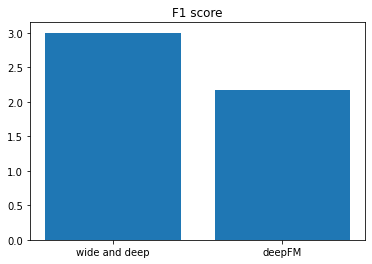

In [24]:
import matplotlib.pyplot as plt

x = ['wide and deep','deepFM']
y = [wnd_f, dfm_f]
plt.bar(x,y)
plt.title('F1 score')
plt.show()

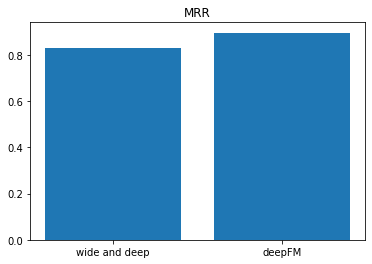

In [31]:
import matplotlib.pyplot as plt

x = ['wide and deep','deepFM']
y = [wnd_mrr, dfm_mrr]
plt.bar(x,y)
plt.title('MRR')
plt.show()

# 논문에 들어갈 리스트 생성

In [32]:
file_c = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/couple_nb.csv')

In [38]:
file_c.loc[:4,['user_id','trip','place_name','place_category','place_address']]

,user_id,trip,place_name,place_category,place_address
0,649,couple,경포호,호수,강원 강릉시 초당동
1,649,couple,만동제과,"제과,베이커리",강원 강릉시 금성로 6
2,649,couple,한점,"육류,고기",강원 춘천시 남춘로36번길 46
3,649,couple,어국,회,강원 강릉시 강동면 정동진리 50-153
4,649,couple,오월,카페,강원 강릉시 경강로2046번길 11-2


In [39]:
file00.loc[:4,['user_id','trip','place_name','place_category','place_address']]

,user_id,trip,place_name,place_category,place_address
0,649,couple,호텔탑스텐 금진온천,온천,강원 강릉시 옥계면 헌화로 455-34 1층
1,649,couple,정동진해변,"해수욕장,해변",강원 강릉시 강동면 정동진리 64-3
2,649,couple,강릉월화거리,테마거리,강원 강릉시 경강로 2111
3,649,couple,석병산,산,강원 강릉시 옥계면 산계리 산 428
4,649,couple,강릉임해자연휴양림,자연휴양림,강원 강릉시 강동면 율곡로 1715-85
